In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.applications import MobileNet, Xception, ResNet50, InceptionV3
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
import os
import numpy as np
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bananapple","key":"8faab5776875cf07f01c3304e312ce10"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d gpiosenka/70-dog-breedsimage-data-set

 99% 213M/215M [00:11<00:00, 24.0MB/s]
100% 215M/215M [00:11<00:00, 20.1MB/s]


In [10]:
#압축풀기
import zipfile

local_zip = '/content/70-dog-breedsimage-data-set.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/dog-breed')
zip_ref.close()

# 경로설정

In [6]:
base_dir='/content/dog-breed'

train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'valid')
test_dir=os.path.join(base_dir,'test')

In [7]:
train_dir_list=os.listdir(train_dir)
print(len(train_dir_list))

val_dir_list=os.listdir(val_dir)
print(len(val_dir_list))

test_dir_list=os.listdir(test_dir)

70
70


In [11]:
print(train_dir_list)

['Labrador', 'Great Perenees', 'Rottweiler', 'Schnauzer', 'Labradoodle', 'Greyhound', 'Boxer', 'African Wild Dog', 'Saint Bernard', 'Clumber', 'Siberian Husky', 'Bulldog', 'Irish Wolfhound', 'Doberman', 'Bearded Collie', 'Pug', 'Cocker', 'Bull Terrier', 'Beagle', 'Bluetick', 'Dhole', 'Vizsla', 'Blenheim', 'Komondor', 'Yorkie', 'Maltese', 'Bermaise', 'Shar_Pei', 'American Spaniel', 'Irish Spaniel', 'Bloodhound', 'American Hairless', 'Dalmation', 'Basset', 'Basenji', 'Scotch Terrier', 'Great Dane', 'French Bulldog', 'Japanese Spaniel', 'Dingo', 'Bichon Frise', 'Pekinese', 'Golden Retriever', 'Border Collie', 'Pit Bull', 'Shih-Tzu', 'Shiba Inu', 'Chihuahua', 'Borzoi', 'Cockapoo', 'Newfoundland', 'Bull Mastiff', 'Chow', 'Airedale', 'Poodle', 'Afghan', 'German Sheperd', 'Malinois', 'Groenendael', 'Chinese Crested', 'Corgi', 'Pomeranian', 'Boston Terrier', 'Coyote', 'Lhasa', 'Elk Hound', 'Collie', 'Rhodesian', 'Mex Hairless', 'Cairn']


In [ ]:
#데이터 개수 확인
sum=0
for i in train_dir_list:
  train_img=os.path.join(train_dir,'{}'.format(i))
  train_img_list=os.listdir(train_img)
  sum+=len(train_img_list)
print(sum)

7946


In [ ]:
sum=0
for i in val_dir_list:
  val_img=os.path.join(val_dir,'{}'.format(i))
  val_img_list=os.listdir(val_img)
  sum+=len(val_img_list)
print(sum)

700


In [ ]:
sum=0
for i in test_dir_list:
  test_img=os.path.join(test_dir,'{}'.format(i))
  test_img_list=os.listdir(test_img)
  sum+=len(test_img_list)
print(sum)

700


# ImageDataGenerator 설정

In [ ]:
img_width=250
img_height=250

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 )
val_datagen=ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory(train_dir,
                                            batch_size=32,
                                            class_mode='sparse',
                                            target_size=(img_width,img_height)
                                            )

val_gen=train_datagen.flow_from_directory(val_dir,
                                          batch_size=32,
                                          class_mode='sparse',
                                          target_size=(img_width,img_height)
                                          )

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [ ]:
#각각의 값 
print(train_gen.class_indices.items())

print(val_gen.class_indices.items())

dict_items([('Afghan', 0), ('African Wild Dog', 1), ('Airedale', 2), ('American Hairless', 3), ('American Spaniel', 4), ('Basenji', 5), ('Basset', 6), ('Beagle', 7), ('Bearded Collie', 8), ('Bermaise', 9), ('Bichon Frise', 10), ('Blenheim', 11), ('Bloodhound', 12), ('Bluetick', 13), ('Border Collie', 14), ('Borzoi', 15), ('Boston Terrier', 16), ('Boxer', 17), ('Bull Mastiff', 18), ('Bull Terrier', 19), ('Bulldog', 20), ('Cairn', 21), ('Chihuahua', 22), ('Chinese Crested', 23), ('Chow', 24), ('Clumber', 25), ('Cockapoo', 26), ('Cocker', 27), ('Collie', 28), ('Corgi', 29), ('Coyote', 30), ('Dalmation', 31), ('Dhole', 32), ('Dingo', 33), ('Doberman', 34), ('Elk Hound', 35), ('French Bulldog', 36), ('German Sheperd', 37), ('Golden Retriever', 38), ('Great Dane', 39), ('Great Perenees', 40), ('Greyhound', 41), ('Groenendael', 42), ('Irish Spaniel', 43), ('Irish Wolfhound', 44), ('Japanese Spaniel', 45), ('Komondor', 46), ('Labradoodle', 47), ('Labrador', 48), ('Lhasa', 49), ('Malinois', 50)

# 모델구축

In [ ]:
from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
from keras.engine.sequential import Sequential
from tensorflow import keras
from keras import regularizers

In [ ]:
#pre-trainded model 불러오기
base_model=Xception(weights='imagenet', include_top=False, input_shape=(img_width,img_height,3))

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
#특징 추출기

base_model.trainabel=False

base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 124, 124, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 124, 124, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
model=Sequential()

model.add(base_model)

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(70, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
              )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dropout (Dropout)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 70)                9030      
                                                                 
Total params: 37,647,854
Trainable params: 37,593,326
No

# 학습하기

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping=EarlyStopping(monitor='val_loss',
                            patience=5
                            )
history=model.fit(train_gen,
                  validation_data=val_gen,
                  epochs=10,
                  steps_per_epoch=100,
                  callbacks=[earlystopping]
                  )

Epoch 1/10
100/100 [==============================] - 92s 919ms/step - loss: 1.4871 - accuracy: 0.6325 - val_loss: 0.5232 - val_accuracy: 0.8829
Epoch 2/10
100/100 [==============================] - 93s 923ms/step - loss: 0.7067 - accuracy: 0.8150 - val_loss: 0.4995 - val_accuracy: 0.8943
Epoch 3/10
100/100 [==============================] - 90s 896ms/step - loss: 0.6154 - accuracy: 0.8486 - val_loss: 0.4835 - val_accuracy: 0.8971
Epoch 4/10
100/100 [==============================] - 91s 902ms/step - loss: 0.4603 - accuracy: 0.8731 - val_loss: 0.4624 - val_accuracy: 0.9143
Epoch 5/10
100/100 [==============================] - 91s 905ms/step - loss: 0.4508 - accuracy: 0.8809 - val_loss: 0.5001 - val_accuracy: 0.9071
Epoch 6/10
100/100 [==============================] - 91s 910ms/step - loss: 0.4234 - accuracy: 0.8894 - val_loss: 0.5085 - val_accuracy: 0.9157
Epoch 7/10
100/100 [==============================] - 91s 911ms/step - loss: 0.3802 - accuracy: 0.9056 - val_loss: 0.4753 - val_ac

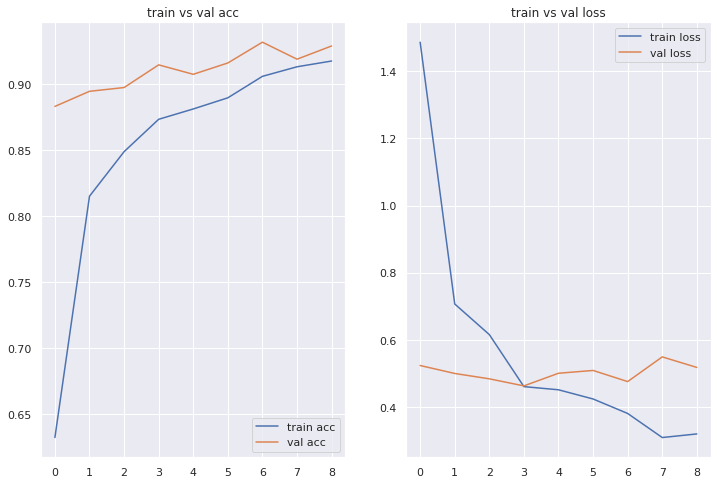

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(9)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='train acc')
plt.plot(epochs_range, val_acc, label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val acc')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='train loss')
plt.plot(epochs_range, val_loss, label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()

In [ ]:
#validation데이터 정확도 확인
test_loss, test_acc = model.evaluate(val_gen,verbose=2)#verbose는 그냥 출력문을 어떤식으로 보여줄까 묻는거 0은 출력문 안보여줌 1은 반만 2는 전체 다 출력

print('\n테스트 정확도:', test_acc)
print('\n테스트 손실값"',test_loss)

22/22 - 10s - loss: 0.5004 - accuracy: 0.9329 - 10s/epoch - 470ms/step

테스트 정확도: 0.9328571557998657

테스트 손실값" 0.5004202127456665


In [ ]:
#모델 저장하기
from keras.models import load_model
model.save('강아지 70종 분류.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
